<a href="https://colab.research.google.com/github/Zenithcoder/analyst-job-roles-in-canada/blob/main/Data_Cleaning_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'data-analyst-job-roles-in-canada:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5549040%2F9180865%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240818%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240818T160942Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4aeb6e5be028cc3ae2d30683404880c60df547c4b2c3d42f66a92ffa2ce778ea9a3f703f4a599de21ee4cc024db8959f4ad5675d69c54a522e582884c96ce3856fe1b685ef88ecc99e6d7b6ddda45f4f0f9ebceb01f38d83fad1feb15bbcd8be601637f8df5b507941ed9089b190ca4b1d977545ccad8d2446f579d3bcdb9a1df90ac1da658a12aec53226fcad56032f9bae3bfa9925bb9be1f6a14e556b2bb0e340996ffe284f08a1c7ec9b7c5975bb056c1acdd526ac3fb781a92b8779b7ed7b611895b39209935a58a8cdc82d3ea0014a69075ccbf9cf0fe6bc9ff2a973d34b72dca80f0726cad4a4bd192cfa6daa43693ff56bd1e9556cd7193d61c3d643,glove-embedding:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5552989%2F9186351%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240818%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240818T160942Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9a1caf449228fbff838032d81fcce171ca9921f8019afd1c7d550b0c62e8d6434f874dd5e3e3ae4797598bdf77af451684630751ecf8c0ee38d5dee9fd4f1cc7dc165129a257a437488053abf8554634ab634ea0696b68ca597eeb7917d4a1cf746b916d42eda9f337c1bbe2c002dfbf15dbd89be9e3343128ed4f64365898556d89cc66d135a16af6890d9bb09ed6f127f50d3b1c430ea905de185cbbbf22fda74547dcf312f1e6806f1e1e997ed92484b93ffa0cc5853426cf9aaba9d96f2c6be9fd7bbc17e633dccf30b7cb2ef20a05b1c029e911be3d126a9eecbeb455b9d04525ef30cdab81fe2eba85c0b8791dbae41f405c30378cdaf1cf8f1f1e18a9'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 288095 bytes downloaded
Downloaded and uncompressed: data-analyst-job-roles-in-canada
[==================================================] 70948816 bytes downloaded
Downloaded and uncompressed: glove-embedding
Data source import complete.


# Complete Data Cleaning Process

I'll be taking raw_dataset.csv and showcase my data transformation skills.     

Lets us start by importing libraries and reading the input file.

In [3]:
!pip install kneed

In [4]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from kneed import KneeLocator

In [5]:
df = pd.read_csv('/kaggle/input/data-analyst-job-roles-in-canada/Raw_Dataset.csv')

In [6]:
# I like to make a copy of the original dataframe, and work on it.
dfCopy = df

## Data Analysis

In [7]:
dfCopy.head(5)

,Job ID,Job Title,Company Name,Language and Tools,Job Salary,City,Province,Job Link
0,job_9c7f38160c736c78,Binance Accelerator Program - Data Analyst (Risk),Binance,"Python, Sql",NaN,Remote,NaN,https://ca.indeed.com/rc/clk?jk=9c7f38160c736c...
1,job_0da15fed6a515fe5,Business Analyst,Canadian Nuclear Laboratories,"Power Bi, Power BI, Excel",NaN,Remote,NaN,https://ca.indeed.com/rc/clk?jk=0da15fed6a515f...
2,job_2dc0470241aa6066,Geophysicist/Data Analyst,Sander Geophysics Limited,NaN,NaN,Ottawa,ON,https://ca.indeed.com/rc/clk?jk=2dc0470241aa60...
3,job_cbbe0e29b236d2b5,Business Intelligence Data Engineer,"Maximus Services, LLC","Fabric, Power BI, Sql, Machine Learning, Genes...","87,875Ã¢â‚¬â€œ$105,000 a year",Toronto,ON,https://ca.indeed.com/rc/clk?jk=cbbe0e29b236d2...
4,job_fe8ad423818b244a,"BUSINESS INTELLIGENCE SPECIALIST, FT",Niagara Health System,"Azure, Power BI, SQL, Aws",55.39Ã¢â‚¬â€œ$62.66 an hour,Niagara,ON,https://ca.indeed.com/rc/clk?jk=fe8ad423818b24...


We can see the Job ID and Job Link won't play significant role in data analysis, so we drop them.

In [8]:
# Dropping the Job ID and Job Link columns
# You can use inplace = True or assign it to the dataframe because
# drop() method does not modify the DataFrame in place by default.
# Instead, it returns a new DataFrame with the specified columns dropped.
dfCopy = dfCopy.drop(columns = ['Job ID','Job Link'])

In [9]:
# Lets find information about the dataset
dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           1796 non-null   object
 1   Company Name        1796 non-null   object
 2   Language and Tools  1629 non-null   object
 3   Job Salary          1239 non-null   object
 4   City                1796 non-null   object
 5   Province            1678 non-null   object
dtypes: object(6)
memory usage: 84.3+ KB


In [10]:
# Let us rename columns to recognize them easily
dfCopy = dfCopy.rename(columns={
    'Job Title': 'Position',
    'Company Name': 'Company',
    'Language and Tools': 'Skill',
    'Job Salary' : 'Salary',
})

In [11]:
# Checking for NULL values
dfCopy.isnull().sum()

,0
Position,0
Company,0
Skill,167
Salary,557
City,0
Province,118


## Treating NULL Values

We noticed columns *'Skill'*, *'Salary'* and *'Province'* has null values.

We can't add random values to 'Skill' columns, so we add 'Undef' to null. Similar, is the case with 'Province' column.

However, 'Salary' column can be adjusted and also we have 1/4th of values as NULL.

Let us just add some values to empty cells, **we will deal with 'Salary' in a moment.**

In [12]:
# Fill missing Province and Lang & tools values with a default value
dfCopy.fillna({'Skill': 'Undef', 'Province' : 'Undef', 'Salary' : 'Undef'}, inplace = True)

In [13]:
dfCopy.head(10)

,Position,Company,Skill,Salary,City,Province
0,Binance Accelerator Program - Data Analyst (Risk),Binance,"Python, Sql",Undef,Remote,Undef
1,Business Analyst,Canadian Nuclear Laboratories,"Power Bi, Power BI, Excel",Undef,Remote,Undef
2,Geophysicist/Data Analyst,Sander Geophysics Limited,Undef,Undef,Ottawa,ON
3,Business Intelligence Data Engineer,"Maximus Services, LLC","Fabric, Power BI, Sql, Machine Learning, Genes...","87,875Ã¢â‚¬â€œ$105,000 a year",Toronto,ON
4,"BUSINESS INTELLIGENCE SPECIALIST, FT",Niagara Health System,"Azure, Power BI, SQL, Aws",55.39Ã¢â‚¬â€œ$62.66 an hour,Niagara,ON
5,Continuous Improvement Analyst,IMP Group,Excel,Undef,Abbotsford,BC
6,IT Business Process Analyst,Ground Effects,"C#, Javascript, Sql, Database",Undef,Windsor,ON
7,Computer Programmer/Analyst,The City of Vancouver,"Database, Sql, Power Platform, Ssis, Azure, Ss...","43.82Ã¢â‚¬â€œ$51.78 an hour, 43.82 to $, 51.78...",Vancouver,BC
8,"Senior Developer, Business Intelligence",Ontario Health,"Power Bi, Power Platform, Ssis, Sql, Big Data,...",Undef,Toronto,ON
9,OPGT MOD Ã¢â‚¬â€œ ONE (1) BUSINESS ANALYST Ã¢â...,Softline Technology,"Sql, Gap, Power BI",Undef,Toronto,ON


In [14]:
# Rechecking we do not have NULL Values
dfCopy.isnull().sum()

,0
Position,0
Company,0
Skill,0
Salary,0
City,0
Province,0


## Let's start Cleaning the Data

### Working with 'Position' column

In [15]:
unique_count = dfCopy['Position'].nunique()
print(f"Number of unique job positions : {unique_count}")

Number of unique job positions : 811


### We need more generic role title in order to identify top jobs

Let us use Clustering approach to group similar items together

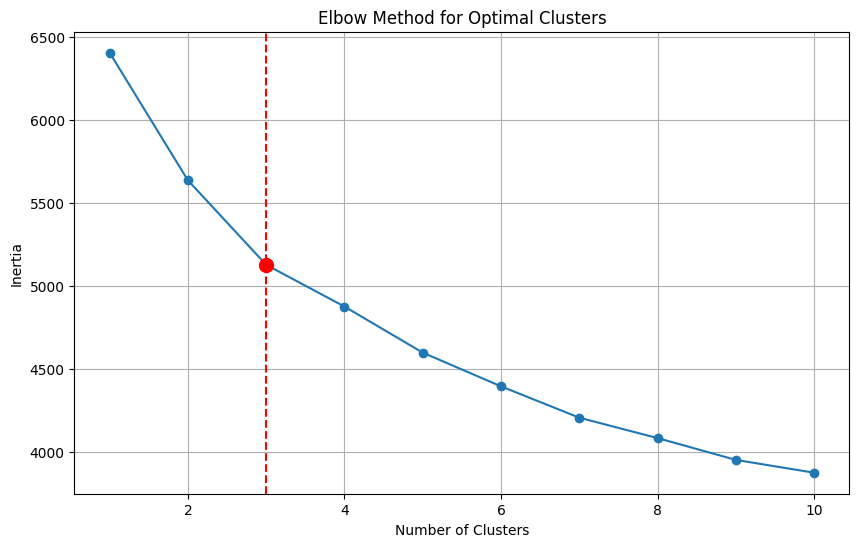

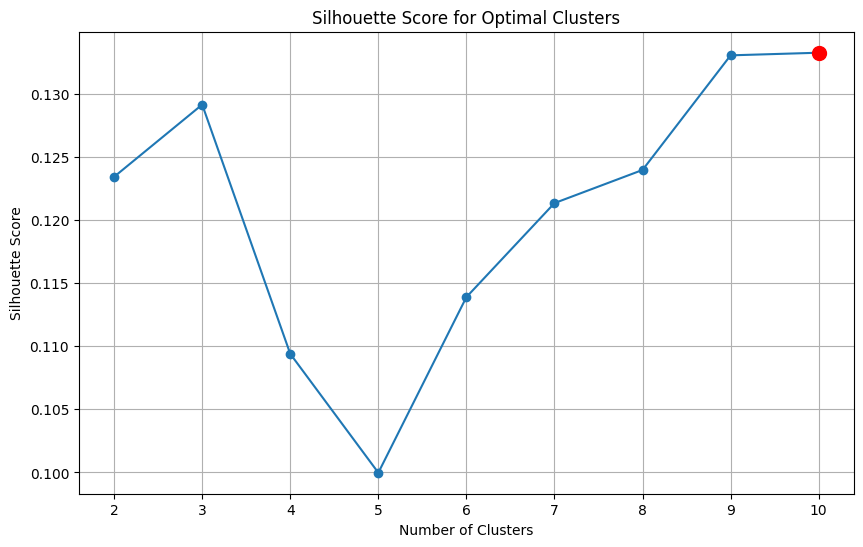

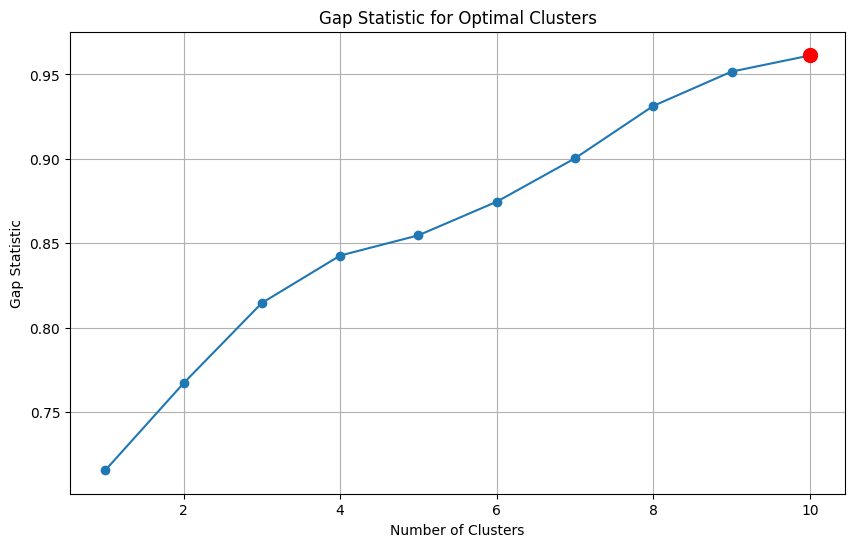



Optimal number of clusters (Elbow Method): 3
Optimal number of clusters (Silhouette Score): 10
Optimal number of clusters (Gap Statistic): 10




In [16]:
# Step 1: Preprocess the job titles
def preprocess_title(title):
    """
    Convert title to lowercase and remove punctuation.
    """
    title = title.lower()
    title = re.sub(r'[^\w\s]', '', title)  # Remove punctuation
    return title

# Apply preprocessing to 'Position'
dfCopy['Refined Title'] = dfCopy['Position'].apply(preprocess_title)

# Step 2: Load GloVe embeddings
def load_glove_embeddings(file_path):
    """
    Load GloVe embeddings from a file into a dictionary.
    """
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Load GloVe embeddings (50-dimensional vectors in this case)
glove_file_path = '/kaggle/input/glove-embedding/glove.6B.50d.txt'
glove_embeddings = load_glove_embeddings(glove_file_path)

# Convert text to vectors using GloVe
def text_to_vector(text, embeddings):
    """
    Convert text into a vector by averaging GloVe vectors of its words.
    """
    words = text.split()
    vectors = [embeddings.get(word, np.zeros(len(next(iter(embeddings.values()))))) for word in words]
    return np.mean(vectors, axis=0) if vectors else np.zeros(len(next(iter(embeddings.values()))))

# Transform job titles into vectors
dfCopy['Vector'] = dfCopy['Refined Title'].apply(lambda x: text_to_vector(x, glove_embeddings))
X = np.array(dfCopy['Vector'].tolist())

# Step 3: Determine the optimal number of clusters using the Elbow Method
inertia = []
for n_clusters in range(1, 11):  # Testing from 1 to 10 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')

# Apply KneeLocator to find the "knee" or "elbow"
kneedle = KneeLocator(range(1, 11), inertia, curve='convex', direction='decreasing')
elbow_optimal_clusters = kneedle.elbow

# Mark the elbow on the plot
plt.axvline(x=elbow_optimal_clusters, color='r', linestyle='--')
plt.scatter(elbow_optimal_clusters, inertia[elbow_optimal_clusters - 1], color='r', s=100, zorder=5)
plt.grid(True)
plt.show()


# Step 4: Determine the optimal number of clusters using the Silhouette Score
silhouette_scores = []
for n_clusters in range(2, 11):  # Testing from 2 to 10 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    clusters = kmeans.fit_predict(X)
    score = silhouette_score(X, clusters)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Clusters')

# Determine the optimal number of clusters based on highest silhouette score
silhouette_optimal_clusters = np.argmax(silhouette_scores) + 2  # Adding 2 because range starts from 2

# Mark the optimal number of clusters on the plot
plt.scatter(silhouette_optimal_clusters, silhouette_scores[np.argmax(silhouette_scores)], color='r', s=100, zorder=5)
plt.grid(True)
plt.show()


# Step 5: Determine the optimal number of clusters using the Gap Statistic
def compute_gap_statistic(X, k_max=10, n_refs=10):
    """
    Compute the Gap Statistic for a range of cluster numbers.
    """
    gaps = []
    stds = []
    for k in range(1, k_max + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X)
        dispersion = np.sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1))

        # Generate reference dispersion
        ref_disps = []
        for _ in range(n_refs):
            ref_points = np.random.uniform(low=np.min(X, axis=0), high=np.max(X, axis=0), size=X.shape)
            ref_dispersion = np.sum(np.min(cdist(ref_points, kmeans.cluster_centers_, 'euclidean'), axis=1))
            ref_disps.append(ref_dispersion)

        gap = np.mean(np.log(ref_disps)) - np.log(dispersion)
        gap_std = np.std(np.log(ref_disps))
        gaps.append(gap)
        stds.append(gap_std)

    return gaps, stds

gaps, stds = compute_gap_statistic(X)

# Plot the Gap Statistic
plt.figure(figsize=(10, 6))
plt.errorbar(range(1, 11), gaps, yerr=stds, fmt='-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic for Optimal Clusters')

# Determine the optimal number of clusters based on highest gap statistic
gap_optimal_clusters = np.argmax(gaps) + 1  # Adding 1 because range starts from 1

# Mark the optimal number of clusters on the plot
plt.scatter(gap_optimal_clusters, gaps[np.argmax(gaps)], color='r', s=100, zorder=5)
plt.grid(True)
plt.show()

print("\n")
print("=================================================================")
print(f"Optimal number of clusters (Elbow Method): {elbow_optimal_clusters}")
print(f"Optimal number of clusters (Silhouette Score): {silhouette_optimal_clusters}")
print(f"Optimal number of clusters (Gap Statistic): {gap_optimal_clusters}")
print("=================================================================")
print("\n")


### We set the optimal no. of clusters to 10.

In [17]:
import warnings
warnings.filterwarnings("ignore")

# Step 6: Apply KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=gap_optimal_clusters, random_state=42)
clusters1 = kmeans.fit_predict(X)
dfCopy['Cluster'] = clusters1

# Step 7: Analyze clusters
cluster_summary = dfCopy.groupby('Cluster')['Position'].apply(list)

In [18]:
dfCopy.head(5)

,Position,Company,Skill,Salary,City,Province,Refined Title,Vector,Cluster
0,Binance Accelerator Program - Data Analyst (Risk),Binance,"Python, Sql",Undef,Remote,Undef,binance accelerator program data analyst risk,"[0.3048449916144212, 0.055318999414642654, 0.7...",1
1,Business Analyst,Canadian Nuclear Laboratories,"Power Bi, Power BI, Excel",Undef,Remote,Undef,business analyst,"[-0.1626685, 0.444635, 0.3553805, 0.81041497, ...",5
2,Geophysicist/Data Analyst,Sander Geophysics Limited,Undef,Undef,Ottawa,ON,geophysicistdata analyst,"[-0.1745149940252304, 0.37805500626564026, 0.3...",9
3,Business Intelligence Data Engineer,"Maximus Services, LLC","Fabric, Power BI, Sql, Machine Learning, Genes...","87,875Ã¢â‚¬â€œ$105,000 a year",Toronto,ON,business intelligence data engineer,"[0.27436575, -0.30685002, 0.8918377, 0.1884117...",1
4,"BUSINESS INTELLIGENCE SPECIALIST, FT",Niagara Health System,"Azure, Power BI, SQL, Aws",55.39Ã¢â‚¬â€œ$62.66 an hour,Niagara,ON,business intelligence specialist ft,"[0.10606326, 0.3278375, 0.5854802, 0.12738675,...",1


### Visualizing the Clusters to Rename them

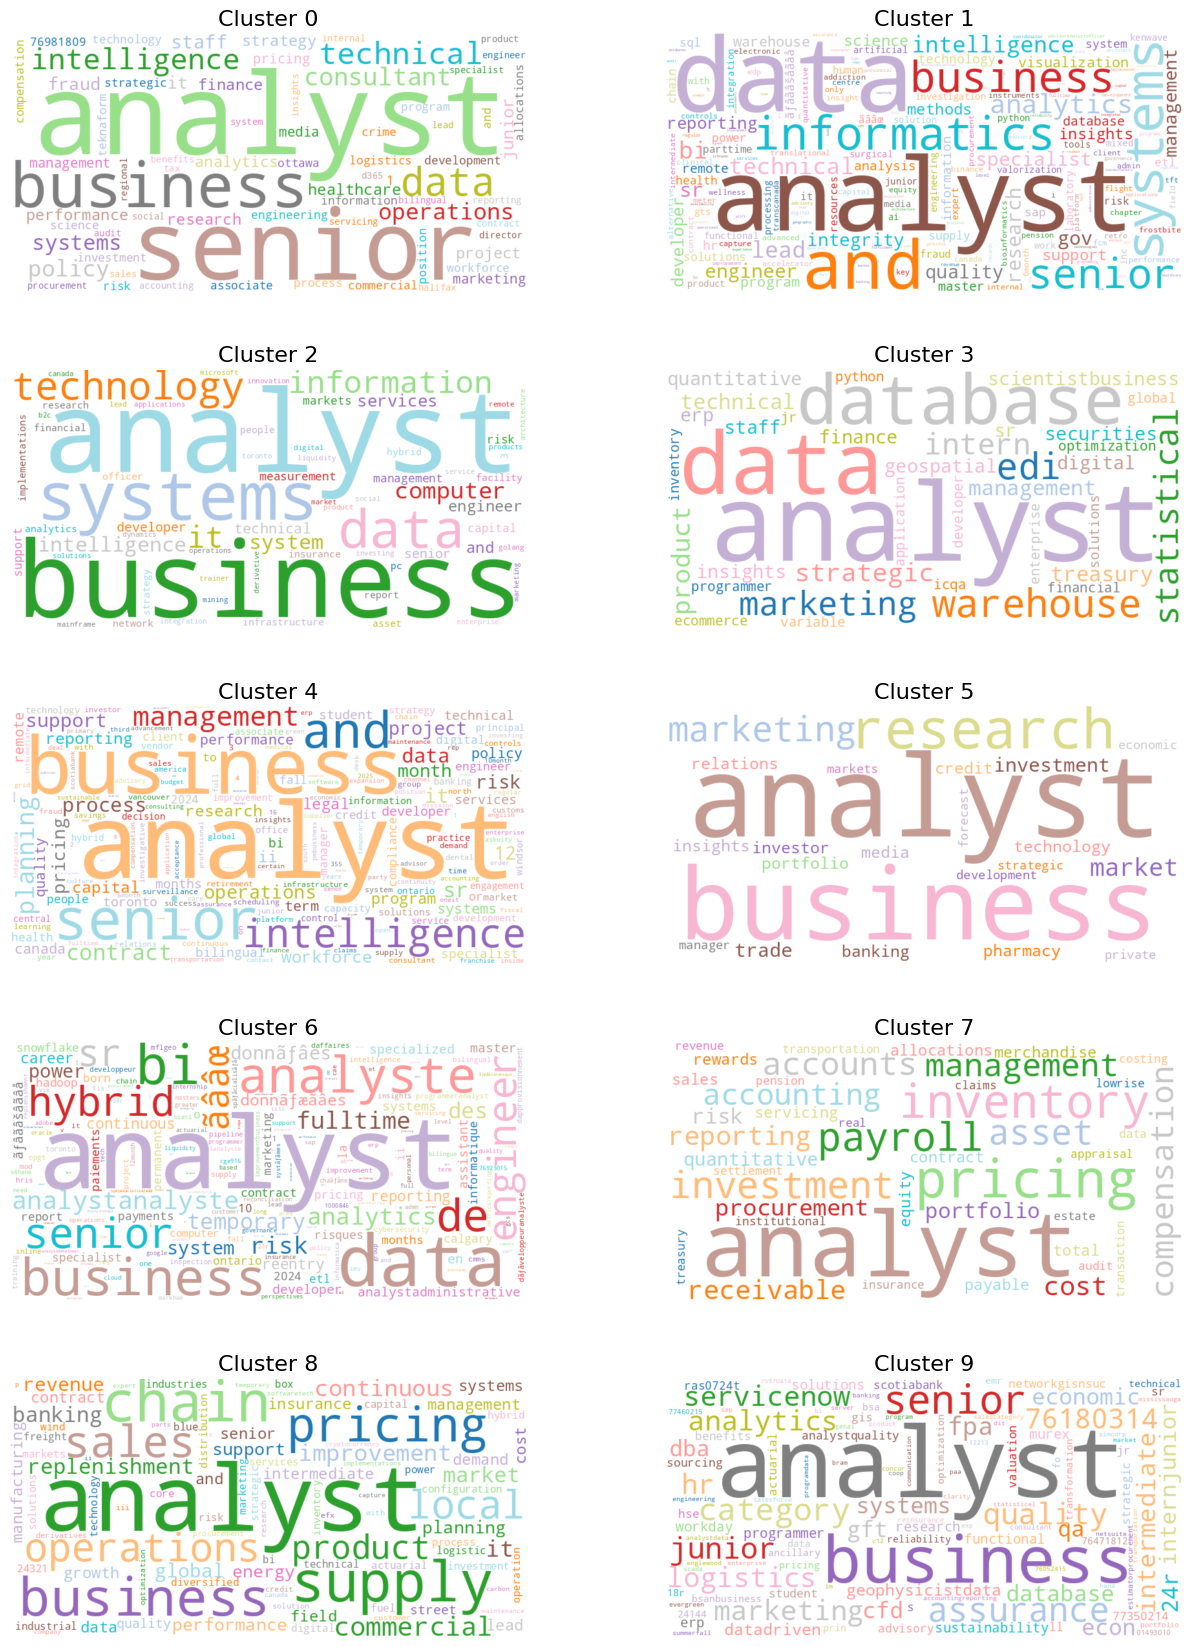

In [19]:
# Get unique clusters and sort them
clusters = sorted(dfCopy['Cluster'].unique())

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 25))
axes = axes.flatten()  # Flatten to make indexing easier

# Define a color map
color_map = plt.get_cmap('tab20', len(clusters))

# Loop through each cluster and create word clouds
for i, cluster in enumerate(clusters):
    # Filter titles for the current cluster
    cluster_text = ' '.join(dfCopy[dfCopy['Cluster'] == cluster]['Refined Title'])

    # Remove punctuation and non-alphanumeric characters
    cluster_text = re.sub(r'[^\w\s]', '', cluster_text)

    # Split text into words
    words = cluster_text.split()

    # Create a word frequency counter
    word_freq = Counter(words)

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab20').generate_from_frequencies(word_freq)

    # Plot the word cloud
    ax = axes[i]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')  # Hide the axes
    ax.set_title(f'Cluster {cluster}', fontsize=16)  # Increase font size for titles

# Remove empty subplots if there are fewer clusters than subplots
if len(clusters) < len(axes):
    for j in range(len(clusters), len(axes)):
        fig.delaxes(axes[j])

# Adjust layout for spacing
plt.tight_layout(pad=1.0, w_pad=10.0, h_pad=-50.0)  # Increase padding between plots

# Show plot
plt.show()


---

### Cluster 0: Systems and Data Analysts

Combines roles related to system analysis and data management.

### Cluster 1: Senior Business Analysts

Represents experienced professionals in business analysis.

### Cluster 2: Business and Technical Analysts

Features roles that blend business analysis with technical expertise.

### Cluster 3 - Senior Supply Chain Data Analysts

A specialist in analyzing business data within supply chain systems

### Cluster 4: Financial and Operational Analysts

Covers financial roles (pricing, payroll) and operational roles (inventory, quality assurance).

### Cluster 5: Business and Marketing Analysts

Includes roles in business analysis and marketing research.

### Cluster 6: Business Systems Analysts

Focused on improving and analyzing business systems and processes.

### Cluster 7: Senior Data Analysts

Experienced professionals who lead advanced data analysis efforts, providing insights and strategic recommendations.

### Cluster 8: Senior Business Intelligence Analysts

For senior roles focusing on data analysis and business intelligence.

### Cluster 9: Database Analysts

Specializes in managing and analyzing data within databases.

---


In [20]:
# Define the mapping of cluster values to job roles
cluster_to_job_title = {
    0: 'Systems and Data Analysts',
    1: 'Senior Business Analysts',
    2: 'Business and Technical Analysts',
    3: 'Senior Supply Chain Data Analysts',
    4: 'Financial and Operational Analysts',
    5: 'Business and Marketing Analysts',
    6: 'Business Systems Analysts',
    7: 'Senior Data Analysts',
    8: 'Senior Business Intelligence Analysts',
    9: 'Database Analysts'
}

# Create the new column with general job titles
dfCopy['Job Roles'] = dfCopy['Cluster'].map(cluster_to_job_title)

# Display the updated DataFrame
dfCopy.head(5)

,Position,Company,Skill,Salary,City,Province,Refined Title,Vector,Cluster,Job Roles
0,Binance Accelerator Program - Data Analyst (Risk),Binance,"Python, Sql",Undef,Remote,Undef,binance accelerator program data analyst risk,"[0.3048449916144212, 0.055318999414642654, 0.7...",1,Senior Business Analysts
1,Business Analyst,Canadian Nuclear Laboratories,"Power Bi, Power BI, Excel",Undef,Remote,Undef,business analyst,"[-0.1626685, 0.444635, 0.3553805, 0.81041497, ...",5,Business and Marketing Analysts
2,Geophysicist/Data Analyst,Sander Geophysics Limited,Undef,Undef,Ottawa,ON,geophysicistdata analyst,"[-0.1745149940252304, 0.37805500626564026, 0.3...",9,Database Analysts
3,Business Intelligence Data Engineer,"Maximus Services, LLC","Fabric, Power BI, Sql, Machine Learning, Genes...","87,875Ã¢â‚¬â€œ$105,000 a year",Toronto,ON,business intelligence data engineer,"[0.27436575, -0.30685002, 0.8918377, 0.1884117...",1,Senior Business Analysts
4,"BUSINESS INTELLIGENCE SPECIALIST, FT",Niagara Health System,"Azure, Power BI, SQL, Aws",55.39Ã¢â‚¬â€œ$62.66 an hour,Niagara,ON,business intelligence specialist ft,"[0.10606326, 0.3278375, 0.5854802, 0.12738675,...",1,Senior Business Analysts


## Lets create columns [Seniority, Industry Type, Work Type.]

In [21]:
# Creating Seniority based on Job Title
# We are using regex because 'i','ii',... needs to be a separate words, not part of the word
def create_regex_patterns(keywords):
    """
    Create regex patterns with word boundaries for a list of keywords.
    """
    return [rf'\b{re.escape(keyword)}\b' for keyword in keywords]

def categorize_title(title):
    # Convert the title to lowercase for consistent comparison
    title_lower = title.lower()

    # Define keywords for each title level
    senior_keywords = ['senior', 'lead', 'principal', 'sr', 'iii', 'iv', 'senior level', 'advanced', 'senior associate','advance', 'expert', 'sr.', 'head', 'chief', 'director', 'manager', 'vp', 'specialist', 'mentor']
    mid_keywords = ['mid-level', 'mid level', 'midlevel', 'mid', 'ii', 'consultant', 'intermediate', 'experienced', 'associate', 'practitioner', 'level 2']
    junior_keywords = ['junior', 'entry level', 'intern', 'internship','apprentice', 'jr', 'i', 'jr.', 'assistant', 'beginner', 'trainee', 'novice', 'entry']

    # Create regex patterns
    senior_patterns = create_regex_patterns(senior_keywords)
    mid_patterns = create_regex_patterns(mid_keywords)
    junior_patterns = create_regex_patterns(junior_keywords)

    # Define the title levels and their patterns
    title_levels = [
        ('Senior', senior_patterns),
        ('Mid', mid_patterns),
        ('Junior', junior_patterns),
    ]

    # Iterate through the title levels and patterns to find a match
    for title_level, patterns in title_levels:
        if any(re.search(pattern, title_lower) for pattern in patterns):
            return title_level

    # Return 'ANY' if no patterns match
    return 'ANY'

# Apply the function to the 'Refined Title' column
dfCopy['Seniority'] = dfCopy['Refined Title'].apply(categorize_title)

# Print the DataFrame to verify
dfCopy[['Refined Title','Seniority']]

,Refined Title,Seniority
0,binance accelerator program data analyst risk,ANY
1,business analyst,ANY
2,geophysicistdata analyst,ANY
3,business intelligence data engineer,ANY
4,business intelligence specialist ft,Senior
...,...,...
1791,im business analyst,ANY
1792,risk analyst third party risk management,ANY
1793,business intelligence analyst,ANY
1794,analyst supply chain replenishment,ANY


In [22]:
# Creating Specific Job Positions
def categorize_title_types(title):
    # Convert the title to lowercase for case-insensitive matching
    title_lower = title.lower()

    # Define a list of title types with associated keywords
    title_types = [
        ('Developer', ['developer']),
        ('Programmer', ['programmer']),
        ('Data Specialist', ['specialist']),
        ('Writer', ['writer']),
        ('Manager', ['manager']),
        ('Data Consultant', ['consultant']),
        ('Coordinator', ['coordinator']),
        ('Technician', ['technician']),
        ('Administrator', ['administrator']),
        ('Admin', ['administrator']),
        ('Data Officer', ['officer']),
        ('Data Associate', ['associate']),
        ('Director', ['director']),
        ('Head', ['head']),
        ('Lead', ['lead']),
        ('Executive', ['executive']),
        ('Consultant', ['consultant']),
        ('Trainer', ['trainer']),
        ('Researcher', ['researcher']),
        ('Strategist', ['strategist']),
        ('Intern', ['intern']),
        ('Data Engineer', ['engineer']),
        ('Data Architect', ['architect']),
        ('Data Scientist', ['scientist']),
        ('Financial Analyst', ['financial analyst', 'finance']),
        ('Statistician', ['maths', 'mathematics', 'commerce']),
        ('Risk Analyst', ['risk analyst', 'risk']),
        ('Operation Analyst', ['Operation analyst', 'Operation']),
        ('Logistic Analyst', ['Logistic analyst','logistic']),
        ('System Analyst', ['Systems analyst', 'system']),
        ('Risk Analyst', ['risk analyst']),
        ('Quantitative Analyst', ['Quantitative Analyst','quantitative']),
        ('Business Analyst', ['business analyst']),
        ('BI Analyst', ['business intelligence analyst', 'business intelligence']),
        ('Data Analyst', ['data analyst']),
        ('Analyst', ['analyst']),
    ]

    # Iterate through the title types and keywords to find a match
    for position_type, keywords in title_types:
        if any(keyword in title_lower for keyword in keywords):
            return position_type

    # Default to 'Other' if no keywords match
    return 'Other'


# Apply the function to the 'Refined Title' column to create a new 'Position Type' column
dfCopy['Position Type'] = dfCopy['Refined Title'].apply(categorize_title_types)

# Print the DataFrame to verify
dfCopy[['Refined Title', 'Position Type']]

,Refined Title,Position Type
0,binance accelerator program data analyst risk,Risk Analyst
1,business analyst,Business Analyst
2,geophysicistdata analyst,Data Analyst
3,business intelligence data engineer,Data Engineer
4,business intelligence specialist ft,Data Specialist
...,...,...
1791,im business analyst,Business Analyst
1792,risk analyst third party risk management,Risk Analyst
1793,business intelligence analyst,BI Analyst
1794,analyst supply chain replenishment,Analyst


In [23]:
dfCopy

,Position,Company,Skill,Salary,City,Province,Refined Title,Vector,Cluster,Job Roles,Seniority,Position Type
0,Binance Accelerator Program - Data Analyst (Risk),Binance,"Python, Sql",Undef,Remote,Undef,binance accelerator program data analyst risk,"[0.3048449916144212, 0.055318999414642654, 0.7...",1,Senior Business Analysts,ANY,Risk Analyst
1,Business Analyst,Canadian Nuclear Laboratories,"Power Bi, Power BI, Excel",Undef,Remote,Undef,business analyst,"[-0.1626685, 0.444635, 0.3553805, 0.81041497, ...",5,Business and Marketing Analysts,ANY,Business Analyst
2,Geophysicist/Data Analyst,Sander Geophysics Limited,Undef,Undef,Ottawa,ON,geophysicistdata analyst,"[-0.1745149940252304, 0.37805500626564026, 0.3...",9,Database Analysts,ANY,Data Analyst
3,Business Intelligence Data Engineer,"Maximus Services, LLC","Fabric, Power BI, Sql, Machine Learning, Genes...","87,875Ã¢â‚¬â€œ$105,000 a year",Toronto,ON,business intelligence data engineer,"[0.27436575, -0.30685002, 0.8918377, 0.1884117...",1,Senior Business Analysts,ANY,Data Engineer
4,"BUSINESS INTELLIGENCE SPECIALIST, FT",Niagara Health System,"Azure, Power BI, SQL, Aws",55.39Ã¢â‚¬â€œ$62.66 an hour,Niagara,ON,business intelligence specialist ft,"[0.10606326, 0.3278375, 0.5854802, 0.12738675,...",1,Senior Business Analysts,Senior,Data Specialist
...,...,...,...,...,...,...,...,...,...,...,...,...
1791,IM Business Analyst,Messa,Information architecture,$67K - $102K(Glassdoor Est.),Ottawa,ON,im business analyst,"[-0.13100499, 0.46919668, 0.6789203, 0.4113899...",9,Database Analysts,ANY,Business Analyst
1792,"Risk Analyst, Third Party Risk Management",Aviva,"SQL, Operational risk management, Vendor manag...",$94K - $110K(Glassdoor Est.),Markham,ON,risk analyst third party risk management,"[0.22891332, 0.14207168, 0.35071, 0.15617664, ...",4,Financial and Operational Analysts,ANY,Risk Analyst
1793,Business Intelligence Analyst,Clio,"Power BI, Data modeling, Business intelligence...",$86K - $94K(Glassdoor Est.),Vancouver,BC,business intelligence analyst,"[0.18428767, 0.14585334, 0.559377, 0.55372566,...",0,Systems and Data Analysts,ANY,BI Analyst
1794,"Analyst, Supply Chain Replenishment",Loblaw Companies Limited,"SQL, SAP, Computer skills, Marketing, Workday",$52K - $59K(Glassdoor Est.),Brampton,ON,analyst supply chain replenishment,"[0.6013525, 0.06703251, 0.1954475, 0.36752748,...",8,Senior Business Intelligence Analysts,ANY,Analyst


In [24]:
# Type of Work - Remote, Hybrid, In-person
def categorize_work_type(title, city):
    # Convert both title and city to lowercase for case-insensitive matching
    title_lower = title.lower()
    city_lower = city.lower()

    # Define a list of work types with associated keywords
    work_types = [
        ('Remote', ['remote', 'work from home', 'wfh', 'telecommute', 'telework']),
        ('Hybrid', ['hybrid', 'partially remote', 'part-time remote', 'flexible']),
        ('In-Person', ['in-person', 'on-site', 'office', 'face-to-face', 'physical location'])
    ]

    # Check the work type keywords in both title and city simultaneously
    combined_text = f"{title_lower} {city_lower}"

    for work_type, keywords in work_types:
        if any(keyword in combined_text for keyword in keywords):
            return work_type

    # Default to 'In-Person' if no keywords match
    return 'In-Person'

# Apply the function to both 'Refined Title' and 'City' columns to create a new 'Work Type' column
dfCopy['Work Type'] = dfCopy.apply(lambda row: categorize_work_type(row['Refined Title'], row['City']), axis=1)

# Print the DataFrame to verify
dfCopy[['Refined Title', 'City', 'Work Type']]


,Refined Title,City,Work Type
0,binance accelerator program data analyst risk,Remote,Remote
1,business analyst,Remote,Remote
2,geophysicistdata analyst,Ottawa,In-Person
3,business intelligence data engineer,Toronto,In-Person
4,business intelligence specialist ft,Niagara,In-Person
...,...,...,...
1791,im business analyst,Ottawa,In-Person
1792,risk analyst third party risk management,Markham,In-Person
1793,business intelligence analyst,Vancouver,In-Person
1794,analyst supply chain replenishment,Brampton,In-Person


In [25]:
# Industry Type
def categorize_industry_type(company_name):
    # Convert company name to lowercase for case-insensitive matching
    company_name_lower = company_name.lower()

    # Define a list of industries with associated keywords
    industry_types = [
    ('Technology', ['tech', 'information', 'software', 'hardware', 'it', 'information technology', 'computing', 'digital','foilcon']),
    ('Finance', ['finance', 'bank', 'investment', 'financial', 'credit', 'securities', 'capital']),
    ('Healthcare', ['healthcare', 'hospital', 'medical', 'pharma', 'biotech', 'med', 'clinic','island health', 'health','cancer']),
    ('Retail', ['retail', 'store', 'shop', 'e-commerce', 'merchant', 'outlet', 'shopping']),
    ('Education', ['education', 'university', 'school', 'college', 'academy', 'institute', 'learning']),
    ('Manufacturing', ['manufacturing', 'factory', 'production', 'plant', 'assembly', 'industrial']),
    ('Telecommunications', ['telecom', 'communication', 'network', 'wireless', 'cellular', 'broadband']),
    ('Energy', ['energy', 'oil', 'gas', 'renewables', 'electric', 'power', 'utilities']),
    ('Consulting', ['consulting', 'advisor', 'consultant', 'advisory', 'strategy', 'solutions']),
    ('Transportation', ['transportation', 'logistic', 'shipping', 'aviation', 'freight', 'delivery']),
    ('Insurance', ['insurance', 'underwriting', 'risk', 'policy', 'coverage']),
    ('Service', ['service', 'services', 'support', 'maintenance', 'facility']),
    ('Government', ['county', 'city', 'state', 'federal', 'municipal', 'government']),
    ('Real Estate', ['real estate', 'property', 'brokerage', 'land', 'estate']),
    ('Legal', ['legal', 'law', 'attorney', 'firm', 'litigation', 'legal services']),
    ('Media', ['media', 'broadcast', 'publishing', 'entertainment', 'press']),
    ('Agriculture', ['agriculture', 'farming', 'agri', 'horticulture', 'crop']),
    ('Automotive', ['automotive', 'car', 'vehicle', 'automobile', 'motor']),
    ('Construction', ['construction', 'builder', 'contractor', 'engineering', 'development']),
    ('Travel', ['travel', 'tourism', 'hospitality', 'resort', 'tour']),
    ('Aerospace', ['aerospace', 'aviation', 'space', 'aircraft', 'defense'])
    ]

    # Iterate through the industry types and keywords to find a match
    for industry_type, keywords in industry_types:
        if any(keyword in company_name_lower for keyword in keywords):
            return industry_type

    # Default to 'Other' if no keywords match
    return 'Others'

# Apply the function to the 'Company Name' column to create a new 'Industry Type' column
dfCopy['Industry Type'] = dfCopy['Company'].apply(categorize_industry_type)

# Print the DataFrame to verify
dfCopy[['Company', 'Industry Type']].head(100)


,Company,Industry Type
0,Binance,Others
1,Canadian Nuclear Laboratories,Others
2,Sander Geophysics Limited,Technology
3,"Maximus Services, LLC",Service
4,Niagara Health System,Healthcare
...,...,...
95,STAR TECH INFOSYSTEMS LTD.,Technology
96,"Acuren Inspection, Inc.",Others
97,Maggas Medical Inc.,Healthcare
98,Collins Aerospace,Aerospace


In [26]:
dfCopy

,Position,Company,Skill,Salary,City,Province,Refined Title,Vector,Cluster,Job Roles,Seniority,Position Type,Work Type,Industry Type
0,Binance Accelerator Program - Data Analyst (Risk),Binance,"Python, Sql",Undef,Remote,Undef,binance accelerator program data analyst risk,"[0.3048449916144212, 0.055318999414642654, 0.7...",1,Senior Business Analysts,ANY,Risk Analyst,Remote,Others
1,Business Analyst,Canadian Nuclear Laboratories,"Power Bi, Power BI, Excel",Undef,Remote,Undef,business analyst,"[-0.1626685, 0.444635, 0.3553805, 0.81041497, ...",5,Business and Marketing Analysts,ANY,Business Analyst,Remote,Others
2,Geophysicist/Data Analyst,Sander Geophysics Limited,Undef,Undef,Ottawa,ON,geophysicistdata analyst,"[-0.1745149940252304, 0.37805500626564026, 0.3...",9,Database Analysts,ANY,Data Analyst,In-Person,Technology
3,Business Intelligence Data Engineer,"Maximus Services, LLC","Fabric, Power BI, Sql, Machine Learning, Genes...","87,875Ã¢â‚¬â€œ$105,000 a year",Toronto,ON,business intelligence data engineer,"[0.27436575, -0.30685002, 0.8918377, 0.1884117...",1,Senior Business Analysts,ANY,Data Engineer,In-Person,Service
4,"BUSINESS INTELLIGENCE SPECIALIST, FT",Niagara Health System,"Azure, Power BI, SQL, Aws",55.39Ã¢â‚¬â€œ$62.66 an hour,Niagara,ON,business intelligence specialist ft,"[0.10606326, 0.3278375, 0.5854802, 0.12738675,...",1,Senior Business Analysts,Senior,Data Specialist,In-Person,Healthcare
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,IM Business Analyst,Messa,Information architecture,$67K - $102K(Glassdoor Est.),Ottawa,ON,im business analyst,"[-0.13100499, 0.46919668, 0.6789203, 0.4113899...",9,Database Analysts,ANY,Business Analyst,In-Person,Others
1792,"Risk Analyst, Third Party Risk Management",Aviva,"SQL, Operational risk management, Vendor manag...",$94K - $110K(Glassdoor Est.),Markham,ON,risk analyst third party risk management,"[0.22891332, 0.14207168, 0.35071, 0.15617664, ...",4,Financial and Operational Analysts,ANY,Risk Analyst,In-Person,Others
1793,Business Intelligence Analyst,Clio,"Power BI, Data modeling, Business intelligence...",$86K - $94K(Glassdoor Est.),Vancouver,BC,business intelligence analyst,"[0.18428767, 0.14585334, 0.559377, 0.55372566,...",0,Systems and Data Analysts,ANY,BI Analyst,In-Person,Others
1794,"Analyst, Supply Chain Replenishment",Loblaw Companies Limited,"SQL, SAP, Computer skills, Marketing, Workday",$52K - $59K(Glassdoor Est.),Brampton,ON,analyst supply chain replenishment,"[0.6013525, 0.06703251, 0.1954475, 0.36752748,...",8,Senior Business Intelligence Analysts,ANY,Analyst,In-Person,Technology


In [27]:
dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Position       1796 non-null   object
 1   Company        1796 non-null   object
 2   Skill          1796 non-null   object
 3   Salary         1796 non-null   object
 4   City           1796 non-null   object
 5   Province       1796 non-null   object
 6   Refined Title  1796 non-null   object
 7   Vector         1796 non-null   object
 8   Cluster        1796 non-null   int32 
 9   Job Roles      1796 non-null   object
 10  Seniority      1796 non-null   object
 11  Position Type  1796 non-null   object
 12  Work Type      1796 non-null   object
 13  Industry Type  1796 non-null   object
dtypes: int32(1), object(13)
memory usage: 189.5+ KB


---

## Lets Work on Salary, as Promised

In [28]:
dfCopy.isnull().sum()

,0
Position,0
Company,0
Skill,0
Salary,0
City,0
Province,0
Refined Title,0
Vector,0
Cluster,0
Job Roles,0


In [29]:
dfCopy['Salary']

,Salary
0,Undef
1,Undef
2,Undef
3,"87,875Ã¢â‚¬â€œ$105,000 a year"
4,55.39Ã¢â‚¬â€œ$62.66 an hour
...,...
1791,$67K - $102K(Glassdoor Est.)
1792,$94K - $110K(Glassdoor Est.)
1793,$86K - $94K(Glassdoor Est.)
1794,$52K - $59K(Glassdoor Est.)


In [30]:
# Let us Analyze the characters present in our Salary Column
# Concatenate all non-digit characters into a single string
non_digit_string = ''.join(dfCopy['Salary'].str.replace(r'\d+', '', regex=True).tolist())

# Convert to a set to get unique characters and then back to a string
unique_non_digit_string = ''.join(sorted(set(non_digit_string)))

print(unique_non_digit_string)

 #$&()*+,-./:;ABCDEFGHIJKLMNOPRSTUVWYabcdefghiklmnopqrstuvwxyz ¢¬ÂÃâœšƒ‚€


    It is a messed up Salary column.

In [31]:
# Function to clean the 'Salary' column
def clean_salary(text):
    if pd.notnull(text):  # Check if the text is not null
        # Replace characters not in the allowed patterns with an empty string
        # If we analyze, Glassdoor has unique 'K' character attached to values, lets convert that to number
        thousand_text = re.sub(r'(\d+)\s*K\b', lambda m: str(int(m.group(1)) * 1000), text)
        # Remove the parentheses
        text_no_parentheses = re.sub(r'\(.*?\)', '', thousand_text)
        # Remove everything except: digits, hour, year, undef, annual, day, - , ‚
        # Just a reminder: The character ‚ is not a comma
        cleaned_text = re.sub(r'[^\d‚\-\s.\b(hour|year|annual|day|Undef)\b]*', '', text_no_parentheses)
        return cleaned_text
    return ''  # Return an empty string if the text is null

# Apply the function to the 'Salary' column
dfCopy['Refined Salary'] = dfCopy['Salary'].apply(clean_salary)


dfCopy[['Salary','Refined Salary']]

,Salary,Refined Salary
0,Undef,Undef
1,Undef,Undef
2,Undef,Undef
3,"87,875Ã¢â‚¬â€œ$105,000 a year",87875‚105000 a year
4,55.39Ã¢â‚¬â€œ$62.66 an hour,55.39‚62.66 an hour
...,...,...
1791,$67K - $102K(Glassdoor Est.),67000 - 102000
1792,$94K - $110K(Glassdoor Est.),94000 - 110000
1793,$86K - $94K(Glassdoor Est.),86000 - 94000
1794,$52K - $59K(Glassdoor Est.),52000 - 59000


In [32]:
dfCopy['Refined Salary'].head(100)

,Refined Salary
0,Undef
1,Undef
2,Undef
3,87875‚105000 a year
4,55.39‚62.66 an hour
...,...
95,47.20 an hour
96,Undef
97,50000‚70000 a year 50000.00-70000.00 er year
98,Undef


In [33]:
# Lets again analyze the characters present in our Salary Column after refining
# Concatenate all non-digit characters into a single string
non_digit_string = ''.join(dfCopy['Refined Salary'].str.replace(r'\d+', '', regex=True).tolist())

# Convert to a set to get unique characters and then back to a string
unique_non_digit_string = ''.join(sorted(set(non_digit_string)))

# Print the unique non-digit characters
print(unique_non_digit_string)

 ()-.Uadefhlnoruy ‚


In [34]:
dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Position        1796 non-null   object
 1   Company         1796 non-null   object
 2   Skill           1796 non-null   object
 3   Salary          1796 non-null   object
 4   City            1796 non-null   object
 5   Province        1796 non-null   object
 6   Refined Title   1796 non-null   object
 7   Vector          1796 non-null   object
 8   Cluster         1796 non-null   int32 
 9   Job Roles       1796 non-null   object
 10  Seniority       1796 non-null   object
 11  Position Type   1796 non-null   object
 12  Work Type       1796 non-null   object
 13  Industry Type   1796 non-null   object
 14  Refined Salary  1796 non-null   object
dtypes: int32(1), object(14)
memory usage: 203.6+ KB


In [35]:
# Create Minimum and Maximum Salary column.
def extract_salaries(salary_text):
    # Find all digit values separated by '‚', '-' or spaces
    matches = re.findall(r'\d+(?:\.\d+)?', salary_text)
    if matches:
        # Convert to float and get the first two values
        numbers = [float(match) for match in matches[:2]]
        # Checking if two separate values are present
        if len(numbers) == 2:
            min_salary, max_salary = numbers
            return min_salary, max_salary
        elif len(numbers) == 1:
            return numbers[0], numbers[0]  # Only one value
    return None, None

# Generalize all salaries to per year
def convert_to_yearly(min_salary, max_salary, salary_text):
    if 'hour' in salary_text:
        # Assuming 2080 work hours per year
        min_salary *= 2080
        max_salary *= 2080
    return min_salary, max_salary


# Apply the extraction function and create new columns
dfCopy[['Min_Salary', 'Max_Salary']] = dfCopy['Refined Salary'].apply(lambda x: pd.Series(extract_salaries(x)))

# Convert to numeric, forcing errors to NaN
dfCopy['Min_Salary'] = pd.to_numeric(dfCopy['Min_Salary'], errors='coerce')
dfCopy['Max_Salary'] = pd.to_numeric(dfCopy['Max_Salary'], errors='coerce')

# Convert to yearly salaries and calculate average
dfCopy[['Min_Salary', 'Max_Salary']] = dfCopy.apply(lambda row: pd.Series(convert_to_yearly(row['Min_Salary'], row['Max_Salary'], row['Refined Salary'])), axis=1)

# Print the DataFrame with relevant columns
dfCopy[['Refined Salary', 'Min_Salary', 'Max_Salary']]

,Refined Salary,Min_Salary,Max_Salary
0,Undef,NaN,NaN
1,Undef,NaN,NaN
2,Undef,NaN,NaN
3,87875‚105000 a year,87875.0,105000.0
4,55.39‚62.66 an hour,115211.2,130332.8
...,...,...,...
1791,67000 - 102000,67000.0,102000.0
1792,94000 - 110000,94000.0,110000.0
1793,86000 - 94000,86000.0,94000.0
1794,52000 - 59000,52000.0,59000.0


In [36]:
print(dfCopy[['Min_Salary', 'Max_Salary']].isna().sum())

Min_Salary    574
Max_Salary    574
dtype: int64


### Data Imputation

In [37]:
# Solving Missing values based on clusters
# Function to impute missing values based on cluster
def impute_missing_by_cluster(df, salary_col):
    # Group by Cluster and calculate the median salary for each cluster
    median_salaries = df.groupby('Cluster')[salary_col].median()

    # Define a function to fill missing values based on cluster
    def fill_missing(row):
        if pd.isna(row[salary_col]):
            return median_salaries[row['Cluster']]
        else:
            return row[salary_col]

    # Apply the function to the DataFrame
    df[salary_col] = df.apply(fill_missing, axis=1)

# Impute missing values for Min_Salary and Max_Salary based on cluster
impute_missing_by_cluster(dfCopy, 'Min_Salary')
impute_missing_by_cluster(dfCopy, 'Max_Salary')

dfCopy.isnull().sum()

,0
Position,0
Company,0
Skill,0
Salary,0
City,0
Province,0
Refined Title,0
Vector,0
Cluster,0
Job Roles,0


In [38]:
dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Position        1796 non-null   object 
 1   Company         1796 non-null   object 
 2   Skill           1796 non-null   object 
 3   Salary          1796 non-null   object 
 4   City            1796 non-null   object 
 5   Province        1796 non-null   object 
 6   Refined Title   1796 non-null   object 
 7   Vector          1796 non-null   object 
 8   Cluster         1796 non-null   int32  
 9   Job Roles       1796 non-null   object 
 10  Seniority       1796 non-null   object 
 11  Position Type   1796 non-null   object 
 12  Work Type       1796 non-null   object 
 13  Industry Type   1796 non-null   object 
 14  Refined Salary  1796 non-null   object 
 15  Min_Salary      1796 non-null   float64
 16  Max_Salary      1796 non-null   float64
dtypes: float64(2), int32(1), object(1

### Let us check Outliers in 'Min and Max Salary' columns
### And Cap them

In [39]:
# Check minimum and maximum values in 'Min_Salary' & 'Max_Salary' column
min_avg_salary = dfCopy['Min_Salary'].min()
max_avg_salary = dfCopy['Min_Salary'].max()

min_max_salary = dfCopy['Max_Salary'].min()
max_max_salary = dfCopy['Max_Salary'].max()

print("Min Salary")
print(f"Minimum : {min_avg_salary}")
print(f"Maximum : {max_avg_salary}")
print("\n")
print("Max Salary")
print(f"Minimum : {min_max_salary}")
print(f"Maximum : {max_max_salary}")

Min Salary
Minimum : 0.0
Maximum : 138661120.0


Max Salary
Minimum : 0.0
Maximum : 192098400.0


### The difference is huge, lets find Q1,Q3, IQR and plot box plot to analyze the outliers.

In [40]:
# Calculate IQR for Min_Salary
Q1_min = round(dfCopy['Min_Salary'].quantile(0.25), 2)
Q3_min = round(dfCopy['Min_Salary'].quantile(0.75), 2)
IQR_min = round(Q3_min - Q1_min, 2)

# Determine outlier bounds for Min_Salary
lower_bound_min = round(Q1_min - 1.5 * IQR_min, 2)
upper_bound_min = round(Q3_min + 1.5 * IQR_min, 2)

# Calculate IQR for Max_Salary
Q1_max = round(dfCopy['Max_Salary'].quantile(0.25), 2)
Q3_max = round(dfCopy['Max_Salary'].quantile(0.75), 2)
IQR_max = round(Q3_max - Q1_max, 2)

# Determine outlier bounds for Max_Salary
lower_bound_max = round(Q1_max - 1.5 * IQR_max, 2)
upper_bound_max = round(Q3_max + 1.5 * IQR_max, 2)

# Print the results
print(f"Min Salary: Q1 - {Q1_min}, Q3 - {Q3_min}, IQR - {IQR_min}, LBound - {lower_bound_min}, UBound - {upper_bound_min}")
print("\n")
print(f"Max Salary: Q1 - {Q1_max}, Q3 - {Q3_max}, IQR - {IQR_max}, LBound - {lower_bound_max}, UBound - {upper_bound_max}")


Min Salary: Q1 - 60000.0, Q3 - 79601.6, IQR - 19601.6, LBound - 30597.6, UBound - 109004.0


Max Salary: Q1 - 78000.0, Q3 - 93600.0, IQR - 15600.0, LBound - 54600.0, UBound - 117000.0


    We noticed IQR of Min_salary > Max_Salary : This causes the lower and upper bounds for Min_Salary to be more spread out compared to Max_Salary.

Box Plot for Minimum Salary


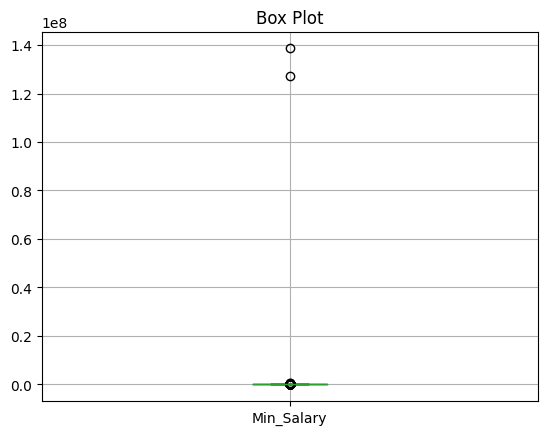

Box Plot for Maxmium Salary


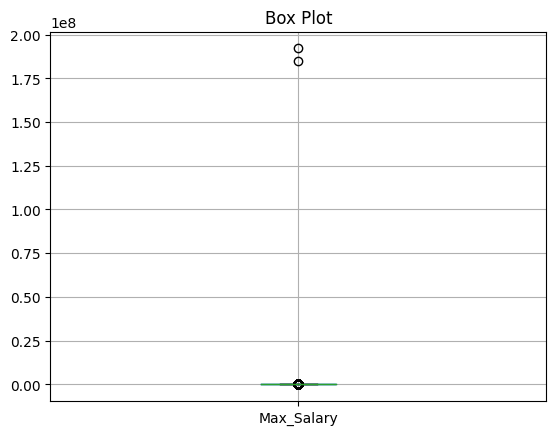

In [41]:
print("Box Plot for Minimum Salary")
dfCopy.boxplot(column='Min_Salary')
plt.title('Box Plot')
plt.show()

print("Box Plot for Maxmium Salary")
dfCopy.boxplot(column='Max_Salary')
plt.title('Box Plot')
plt.show()

    Let us use Winsorizing to limit extreme values by replacing them with the nearest non-outlier value.

---
This argument specifies that 1% of the data from both ends (lower and upper) should be replaced.    
Top 1% Outliers: Replaced with the value at the 99th percentile.
Bottom 1% Outliers: Replaced with the value at the 1st percentile.

In [42]:
from scipy.stats import mstats
dfCopy['Min_Salary'] = mstats.winsorize(dfCopy['Min_Salary'], limits=[0.01, 0.01])  # Replace top and bottom 1%
dfCopy['Max_Salary'] = mstats.winsorize(dfCopy['Max_Salary'], limits=[0.01, 0.01])

Box Plot for Minimum Salary


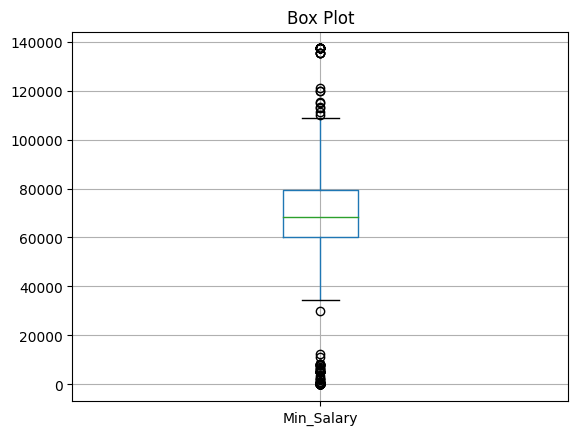

Box Plot for Maxmium Salary


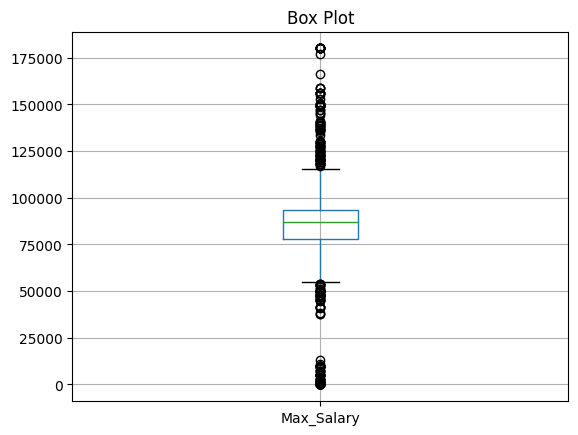

In [43]:
print("Box Plot for Minimum Salary")
dfCopy.boxplot(column='Min_Salary')
plt.title('Box Plot')
plt.show()

print("Box Plot for Maxmium Salary")
dfCopy.boxplot(column='Max_Salary')
plt.title('Box Plot')
plt.show()

    That is a big improvement, now since most lower bounds lie near 0, we can cap lower bound outliers to nearest minimum value. Upper bound values look fine.

In [44]:
# Cap or floor outliers in Min_Salary
dfCopy['Min_Salary'] = np.where(dfCopy['Min_Salary'] < lower_bound_min, lower_bound_min, dfCopy['Min_Salary'])
# dfCopy['Min_Salary'] = np.where(dfCopy['Min_Salary'] > upper_bound_min, upper_bound_min, dfCopy['Min_Salary'])

# Cap or floor outliers in Max_Salary
dfCopy['Max_Salary'] = np.where(dfCopy['Max_Salary'] < lower_bound_max, lower_bound_max, dfCopy['Max_Salary'])
# dfCopy['Max_Salary'] = np.where(dfCopy['Max_Salary'] > upper_bound_max, upper_bound_max, dfCopy['Max_Salary'])

# Display the DataFrame
print(dfCopy[['Min_Salary', 'Max_Salary']])

      Min_Salary  Max_Salary
0        71000.0     89440.0
1        65000.0     88000.0
2        65000.0     87000.0
3        87875.0    105000.0
4       115211.2    130332.8
...          ...         ...
1791     67000.0    102000.0
1792     94000.0    110000.0
1793     86000.0     94000.0
1794     52000.0     59000.0
1795     72000.0    153000.0

[1796 rows x 2 columns]


In [45]:
# Check minimum and maximum values in 'Min_Salary' & 'Max_Salary' column
new_minmin_salary = dfCopy['Min_Salary'].min()
new_minmax_salary = dfCopy['Min_Salary'].max()

new_maxmin_salary = dfCopy['Max_Salary'].min()
new_maxmax_salary = dfCopy['Max_Salary'].max()

print("Min Salary")
print(f"Minimum : {new_minmin_salary}")
print(f"Maximum : {new_minmax_salary}")
print("\n")
print("Max Salary")
print(f"Minimum : {new_maxmin_salary}")
print(f"Maximum : {new_maxmax_salary}")

Min Salary
Minimum : 30597.6
Maximum : 137280.0


Max Salary
Minimum : 54600.0
Maximum : 180000.0


In [46]:
#Calcuate the Average Salary
def calculate_average(min_salary, max_salary):
    if min_salary is not None and max_salary is not None:
        return (min_salary + max_salary) / 2
    return None

dfCopy['Avg_Salary'] = dfCopy.apply(lambda row: calculate_average(row['Min_Salary'], row['Max_Salary']), axis=1)


In [47]:
dfCopy.isnull().sum()

,0
Position,0
Company,0
Skill,0
Salary,0
City,0
Province,0
Refined Title,0
Vector,0
Cluster,0
Job Roles,0


In [48]:
dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Position        1796 non-null   object 
 1   Company         1796 non-null   object 
 2   Skill           1796 non-null   object 
 3   Salary          1796 non-null   object 
 4   City            1796 non-null   object 
 5   Province        1796 non-null   object 
 6   Refined Title   1796 non-null   object 
 7   Vector          1796 non-null   object 
 8   Cluster         1796 non-null   int32  
 9   Job Roles       1796 non-null   object 
 10  Seniority       1796 non-null   object 
 11  Position Type   1796 non-null   object 
 12  Work Type       1796 non-null   object 
 13  Industry Type   1796 non-null   object 
 14  Refined Salary  1796 non-null   object 
 15  Min_Salary      1796 non-null   float64
 16  Max_Salary      1796 non-null   float64
 17  Avg_Salary      1796 non-null   f

In [49]:
dfCopy

,Position,Company,Skill,Salary,City,Province,Refined Title,Vector,Cluster,Job Roles,Seniority,Position Type,Work Type,Industry Type,Refined Salary,Min_Salary,Max_Salary,Avg_Salary
0,Binance Accelerator Program - Data Analyst (Risk),Binance,"Python, Sql",Undef,Remote,Undef,binance accelerator program data analyst risk,"[0.3048449916144212, 0.055318999414642654, 0.7...",1,Senior Business Analysts,ANY,Risk Analyst,Remote,Others,Undef,71000.0,89440.0,80220.0
1,Business Analyst,Canadian Nuclear Laboratories,"Power Bi, Power BI, Excel",Undef,Remote,Undef,business analyst,"[-0.1626685, 0.444635, 0.3553805, 0.81041497, ...",5,Business and Marketing Analysts,ANY,Business Analyst,Remote,Others,Undef,65000.0,88000.0,76500.0
2,Geophysicist/Data Analyst,Sander Geophysics Limited,Undef,Undef,Ottawa,ON,geophysicistdata analyst,"[-0.1745149940252304, 0.37805500626564026, 0.3...",9,Database Analysts,ANY,Data Analyst,In-Person,Technology,Undef,65000.0,87000.0,76000.0
3,Business Intelligence Data Engineer,"Maximus Services, LLC","Fabric, Power BI, Sql, Machine Learning, Genes...","87,875Ã¢â‚¬â€œ$105,000 a year",Toronto,ON,business intelligence data engineer,"[0.27436575, -0.30685002, 0.8918377, 0.1884117...",1,Senior Business Analysts,ANY,Data Engineer,In-Person,Service,87875‚105000 a year,87875.0,105000.0,96437.5
4,"BUSINESS INTELLIGENCE SPECIALIST, FT",Niagara Health System,"Azure, Power BI, SQL, Aws",55.39Ã¢â‚¬â€œ$62.66 an hour,Niagara,ON,business intelligence specialist ft,"[0.10606326, 0.3278375, 0.5854802, 0.12738675,...",1,Senior Business Analysts,Senior,Data Specialist,In-Person,Healthcare,55.39‚62.66 an hour,115211.2,130332.8,122772.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,IM Business Analyst,Messa,Information architecture,$67K - $102K(Glassdoor Est.),Ottawa,ON,im business analyst,"[-0.13100499, 0.46919668, 0.6789203, 0.4113899...",9,Database Analysts,ANY,Business Analyst,In-Person,Others,67000 - 102000,67000.0,102000.0,84500.0
1792,"Risk Analyst, Third Party Risk Management",Aviva,"SQL, Operational risk management, Vendor manag...",$94K - $110K(Glassdoor Est.),Markham,ON,risk analyst third party risk management,"[0.22891332, 0.14207168, 0.35071, 0.15617664, ...",4,Financial and Operational Analysts,ANY,Risk Analyst,In-Person,Others,94000 - 110000,94000.0,110000.0,102000.0
1793,Business Intelligence Analyst,Clio,"Power BI, Data modeling, Business intelligence...",$86K - $94K(Glassdoor Est.),Vancouver,BC,business intelligence analyst,"[0.18428767, 0.14585334, 0.559377, 0.55372566,...",0,Systems and Data Analysts,ANY,BI Analyst,In-Person,Others,86000 - 94000,86000.0,94000.0,90000.0
1794,"Analyst, Supply Chain Replenishment",Loblaw Companies Limited,"SQL, SAP, Computer skills, Marketing, Workday",$52K - $59K(Glassdoor Est.),Brampton,ON,analyst supply chain replenishment,"[0.6013525, 0.06703251, 0.1954475, 0.36752748,...",8,Senior Business Intelligence Analysts,ANY,Analyst,In-Person,Technology,52000 - 59000,52000.0,59000.0,55500.0


## Generating Output DataFrame

In [50]:
# Create a new DataFrame with selected columns and rename columns
dFinal = dfCopy[['Job Roles','Position', 'Position Type','Company', 'City','Province','Skill','Seniority','Work Type','Industry Type','Min_Salary', 'Max_Salary', 'Avg_Salary']].rename(columns={
    'Company': 'Employer',
    'Job Roles': 'Job Title',
    'Position': 'Job Info',
    'Position Type':'Position',
})
dFinal

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary
0,Senior Business Analysts,Binance Accelerator Program - Data Analyst (Risk),Risk Analyst,Binance,Remote,Undef,"Python, Sql",ANY,Remote,Others,71000.0,89440.0,80220.0
1,Business and Marketing Analysts,Business Analyst,Business Analyst,Canadian Nuclear Laboratories,Remote,Undef,"Power Bi, Power BI, Excel",ANY,Remote,Others,65000.0,88000.0,76500.0
2,Database Analysts,Geophysicist/Data Analyst,Data Analyst,Sander Geophysics Limited,Ottawa,ON,Undef,ANY,In-Person,Technology,65000.0,87000.0,76000.0
3,Senior Business Analysts,Business Intelligence Data Engineer,Data Engineer,"Maximus Services, LLC",Toronto,ON,"Fabric, Power BI, Sql, Machine Learning, Genes...",ANY,In-Person,Service,87875.0,105000.0,96437.5
4,Senior Business Analysts,"BUSINESS INTELLIGENCE SPECIALIST, FT",Data Specialist,Niagara Health System,Niagara,ON,"Azure, Power BI, SQL, Aws",Senior,In-Person,Healthcare,115211.2,130332.8,122772.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,Database Analysts,IM Business Analyst,Business Analyst,Messa,Ottawa,ON,Information architecture,ANY,In-Person,Others,67000.0,102000.0,84500.0
1792,Financial and Operational Analysts,"Risk Analyst, Third Party Risk Management",Risk Analyst,Aviva,Markham,ON,"SQL, Operational risk management, Vendor manag...",ANY,In-Person,Others,94000.0,110000.0,102000.0
1793,Systems and Data Analysts,Business Intelligence Analyst,BI Analyst,Clio,Vancouver,BC,"Power BI, Data modeling, Business intelligence...",ANY,In-Person,Others,86000.0,94000.0,90000.0
1794,Senior Business Intelligence Analysts,"Analyst, Supply Chain Replenishment",Analyst,Loblaw Companies Limited,Brampton,ON,"SQL, SAP, Computer skills, Marketing, Workday",ANY,In-Person,Technology,52000.0,59000.0,55500.0


In [51]:
# Export df to CSV
dFinal.to_csv('Cleaned_Dataset.csv', index=False)

In [54]:
df_2=pd.read_csv("./Cleaned_Dataset.csv")
df_2.shape

(1796, 13)